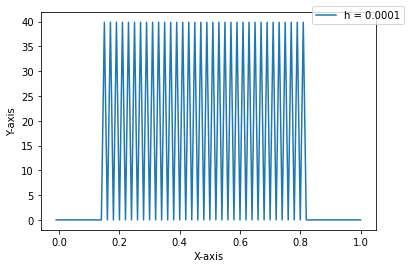

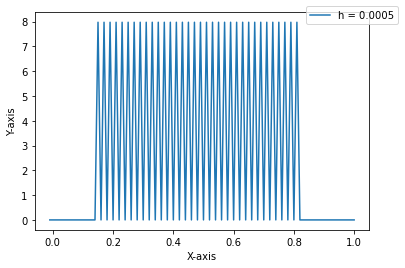

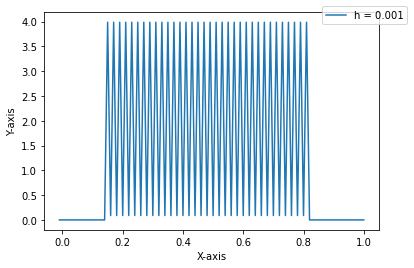

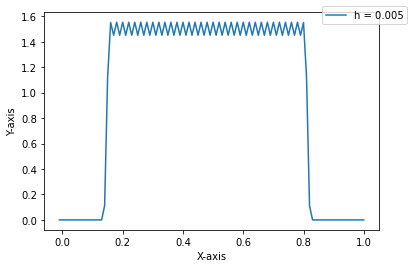

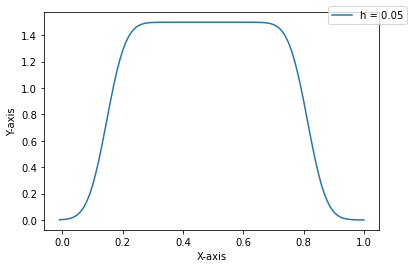

In [25]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

a3_q7 = pd.read_csv('a3_q7.csv')
a3_q7_numpy = a3_q7.to_numpy()
D = a3_q7_numpy

mean = 0
variance = 1
x_array = np.arange(start=-0.01, stop=1.01, step=0.01)
h_array = [0.0001,  0.0005,  0.001,  0.005,  0.05]


def ker(u):
    denominator = math.sqrt(variance*2*math.pi)
    numerator_exponent = -((u-mean)*(u-mean)/(2*variance))
    numerator = math.exp(numerator_exponent)
    pdf = numerator/denominator
    return pdf


def normal_kde(x, h, D):
    sum_k = 0
    for points in D:
        u = (x-points[1])/h
        sum_k = sum_k + ker(u)

    return sum_k/(len(D)*h)

# fig, axs = plt.subplots(len(h_array),figsize=(10,30))

for i in range(len(h_array)):
    y = []
    for x in x_array:
        y.append(normal_kde(x, h_array[i], D))
    tag = "h = "+str(h_array[i])
    plt.plot(x_array, y,label=tag)
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.legend(bbox_to_anchor=(1.1, 1.05))
    plt.show()


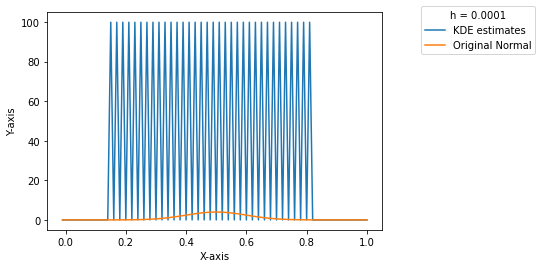

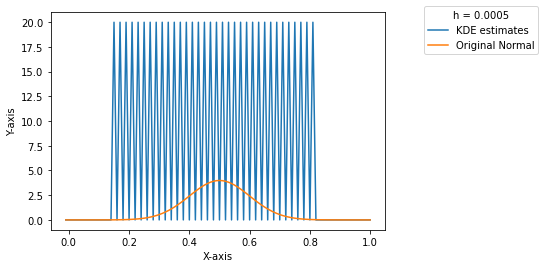

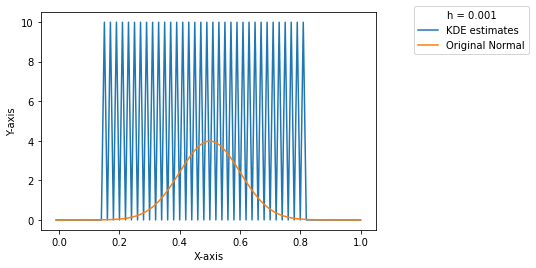

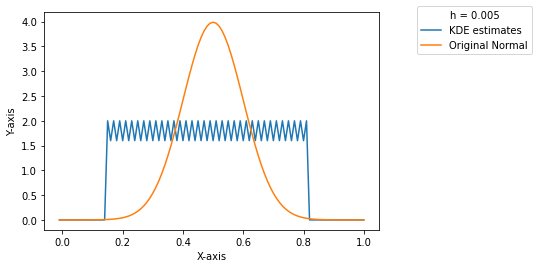

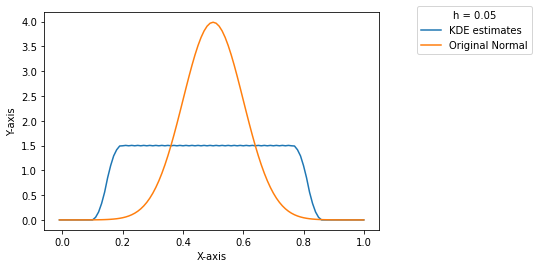

In [33]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import norm

a3_q7 = pd.read_csv('a3_q7.csv')
a3_q7_numpy = a3_q7.to_numpy()
D = a3_q7_numpy

x_array = np.arange(start=-0.01, stop=1.01, step=0.01)
h_array = [0.0001,  0.0005,  0.001,  0.005,  0.05]


def ker(u):
    if(abs(u) <= 1):
        return 1-abs(u)
    else:
        return 0


def triangular_kde(x, h, D):
    sum_k = 0
    for points in D:
        u = (x-points[1])/h
        sum_k = sum_k + ker(u)

    return sum_k/(len(D)*h)


for i in range(len(h_array)):
    y = []
    y_original = []
    for x in x_array:
        y.append(triangular_kde(x, h_array[i], D))
        y_original.append(norm.pdf(x, 0.5, np.sqrt(0.01)))
    heading = "h = "+str(h_array[i])
    tag1 = "KDE estimates"
    tag2 = "Original Normal"
    plt.plot(x_array, y, label=tag1)
    plt.plot(x_array, y_original, label=tag2)
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.legend(title = heading, loc="upper left", bbox_to_anchor=(1.1, 1.05))
    plt.show()

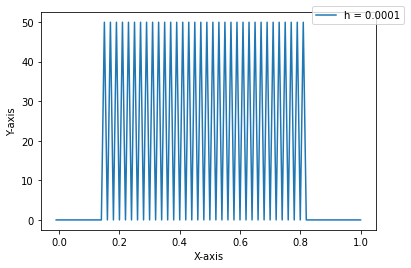

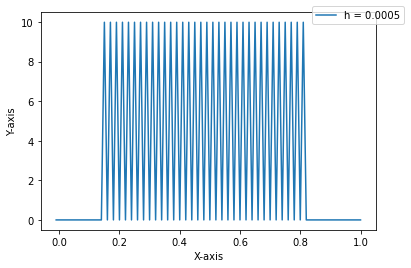

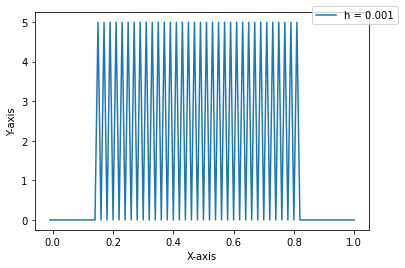

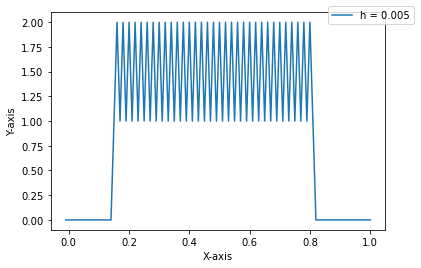

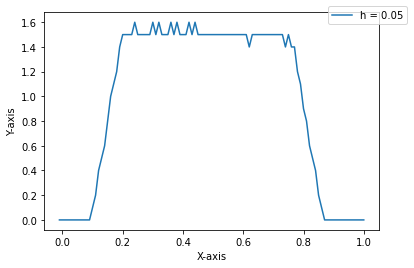

In [24]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import norm

a3_q7 = pd.read_csv('a3_q7.csv')
a3_q7_numpy = a3_q7.to_numpy()
D = a3_q7_numpy
x_array = np.arange(start=-0.01, stop=1.01, step=0.01)
h_array = [0.0001,  0.0005,  0.001,  0.005,  0.05]


def ker(u):
    if(u <= 1 and u >= -1):
        return 0.5
    else:
        return 0


def uniform_kde(x, h, D):
    sum_k = 0
    for points in D:
        u = (x-points[1])/h
        sum_k = sum_k + ker(u)

    return sum_k/(len(D)*h)


for i in range(len(h_array)):
    y = []
    for x in x_array:
        y.append(uniform_kde(x, h_array[i], D))
    tag = "h = "+str(h_array[i])
    plt.plot(x_array, y,label=tag)
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.legend(bbox_to_anchor=(1.1, 1.05))
    plt.show()